In [72]:
import pandas as pd 
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier



In [73]:
df = pd.read_csv("../Resources/acc_intake_outcome.csv")
df.head()

,index_id_intake,animal_id_intake,datetime_intake,monthyear_intake,found_location,intake_type,intake_condition,animal_type_intake,sex_upon_intake,age_upon_intake,...,order_of_outcome,breed_intake_subtype,main_breed_intake,breed_contains_pitbull,sex_upon_intake_subtype,time_in_shelter,days_in_shelter,zipcode_intake,longitude_intake,latitude_intake
0,70641,A178569,2014-03-17 09:45:00,March 2014,Austin (TX),Public Assist,Normal,Dog,Neutered Male,15 years,...,1,Mix,Shetland Sheepdog,N,Male,6 days 06:12:00,6,NaN,NaN,NaN
1,944,A287017,2015-08-16 12:19:00,August 2015,6620 Deatonhill Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,14 years,...,2,Mix,Chihuahua Shorthair,N,Female,01:12:00,0,NaN,NaN,NaN
2,69127,A293383,2018-03-18 18:17:00,March 2018,6005 Walnut Hills in Austin (TX),Stray,Sick,Cat,Neutered Male,15 years,...,1,Purebred,Siamese,N,Male,19:27:00,0,78723.0,"-97.67646196099997,30.306264894000037",63951360.0
3,58622,A298677,2015-07-27 12:44:00,July 2015,Manor (TX),Euthanasia Request,Sick,Dog,Spayed Female,13 years,...,1,Mix,German Shepherd,N,Female,01:15:00,0,NaN,NaN,NaN
4,69739,A302868,2018-06-27 09:03:00,June 2018,Pecan Creek Pkwy & Hard Rock Rd in Austin (TX),Stray,Aged,Cat,Spayed Female,15 years,...,1,Mix,Domestic Shorthair,N,Female,17 days 06:28:00,17,NaN,NaN,NaN


In [74]:
df_dog = df[df['animal_type_intake']=='Dog']
df_dog.head(3)

,index_id_intake,animal_id_intake,datetime_intake,monthyear_intake,found_location,intake_type,intake_condition,animal_type_intake,sex_upon_intake,age_upon_intake,...,order_of_outcome,breed_intake_subtype,main_breed_intake,breed_contains_pitbull,sex_upon_intake_subtype,time_in_shelter,days_in_shelter,zipcode_intake,longitude_intake,latitude_intake
0,70641,A178569,2014-03-17 09:45:00,March 2014,Austin (TX),Public Assist,Normal,Dog,Neutered Male,15 years,...,1,Mix,Shetland Sheepdog,N,Male,6 days 06:12:00,6,NaN,NaN,NaN
1,944,A287017,2015-08-16 12:19:00,August 2015,6620 Deatonhill Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,14 years,...,2,Mix,Chihuahua Shorthair,N,Female,01:12:00,0,NaN,NaN,NaN
3,58622,A298677,2015-07-27 12:44:00,July 2015,Manor (TX),Euthanasia Request,Sick,Dog,Spayed Female,13 years,...,1,Mix,German Shepherd,N,Female,01:15:00,0,NaN,NaN,NaN


In [75]:
df_dog_ML = df_dog.copy()
df_dog_ML.columns


Index(['index_id_intake', 'animal_id_intake', 'datetime_intake',
       'monthyear_intake', 'found_location', 'intake_type', 'intake_condition',
       'animal_type_intake', 'sex_upon_intake', 'age_upon_intake',
       'breed_intake', 'color_intake', 'age_upon_intake(days)',
       'age_upon_intake(years)', 'age_range_intake', 'intake_month',
       'intake_year', 'intake_weekday', 'intake_hour', 'intake_frequency',
       'order_of_intake', 'index_id_outcome', 'animal_id_outcome',
       'datetime_outcome', 'monthyear_outcome', 'date_of_birth_outcome',
       'outcome_type', 'outcome_subtype', 'animal_type_outcome',
       'sex_upon_outcome', 'age_upon_outcome', 'breed_outcome',
       'color_outcome', 'age_upon_outcome(days)', 'outcome_month',
       'outcome_year', 'outcome_weekday', 'outcome_hour',
       'age_upon_outcome(years)', 'age_range_outcome', 'outcome_frequency',
       'order_of_outcome', 'breed_intake_subtype', 'main_breed_intake',
       'breed_contains_pitbull', 'sex_

# Keep following columns  age ,  breed , color , intake type,intake condition & outcome type

In [76]:
df_dog_ML= df_dog.drop(['index_id_intake','animal_id_intake','age_range_intake', 'breed_outcome','datetime_intake',
                'monthyear_intake', 'found_location','sex_upon_intake','intake_month','intake_year','age_upon_intake', 
                'intake_weekday', 'intake_hour', 'intake_frequency','order_of_intake','index_id_outcome',
                'animal_id_outcome','datetime_outcome', 'monthyear_outcome', 'date_of_birth_outcome', 'outcome_subtype', 'animal_type_outcome','sex_upon_outcome',  'outcome_month',
                'outcome_year', 'outcome_weekday', 'outcome_hour','outcome_frequency','order_of_outcome',
               'age_upon_intake(years)', 'age_upon_outcome','age_upon_outcome(years)',
                'age_range_outcome','color_outcome', 'breed_intake_subtype','breed_contains_pitbull',
                'sex_upon_intake_subtype','time_in_shelter','main_breed_intake',
                'zipcode_intake','longitude_intake','latitude_intake'],axis=1)

In [77]:
df_dog_ML.head()

,intake_type,intake_condition,animal_type_intake,breed_intake,color_intake,age_upon_intake(days),outcome_type,age_upon_outcome(days),days_in_shelter
0,Public Assist,Normal,Dog,Shetland Sheepdog Mix,White/Black,5475,Return to Owner,5485,6
1,Stray,Normal,Dog,Chihuahua Shorthair Mix,Black/White,5110,Return to Owner,5208,0
3,Euthanasia Request,Sick,Dog,German Shepherd Mix,Tan,4745,Euthanasia,4880,0
5,Owner Surrender,Normal,Dog,Parson Russell Terrier Mix,Brown/White,4380,Transfer,4454,11
6,Stray,Normal,Dog,Bullmastiff Mix,Black/White,4745,Return to Owner,4997,0


### Checking for the unique values of the all the categories that we choose for ML.

In [78]:
col = ['intake_type','intake_condition','animal_type_intake','breed_intake','color_intake','outcome_type']

for col in df_dog_ML[col]:
    print(col,df_dog_ML[col].nunique())


intake_type 5
intake_condition 13
animal_type_intake 1
breed_intake 2453
color_intake 386
outcome_type 10


In [79]:
df_dog_ML['intake_condition'].unique()

array(['Normal', 'Sick', 'Injured', 'Aged', 'Nursing', 'Medical', 'Other',
       'Pregnant', 'Neonatal', 'Behavior', 'Feral', 'Med Urgent',
       'Med Attn'], dtype=object)

### Hot encoding color_intake to 10 categories and other  (616 in total)

In [80]:
# finding the count of all categories in color_intake
color_intake_counts = df_dog_ML.color_intake.value_counts()
color_intake_counts.head(10)

Black/White    9464
Brown/White    4577
White          4261
Tan/White      4204
Black          4195
Tan            3526
Brown          3208
Black/Tan      3070
Tricolor       3068
Black/Brown    2895
Name: color_intake, dtype: int64

<AxesSubplot:ylabel='Density'>

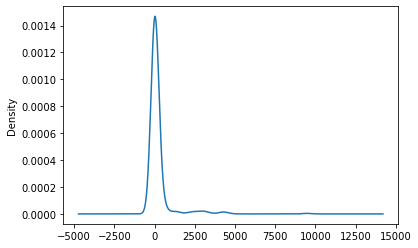

In [81]:
color_intake_counts.plot.density()

In [82]:
# Determine which values to replace
replace_color_intake = list(color_intake_counts[color_intake_counts < 2895].index)

# Replace in DataFrame
for color in replace_color_intake:
    df_dog_ML.color_intake = df_dog_ML.color_intake.replace(color,"Other")


# Check to make sure binning was successful
df_dog_ML.color_intake.value_counts()


Other          37646
Black/White     9464
Brown/White     4577
White           4261
Tan/White       4204
Black           4195
Tan             3526
Brown           3208
Black/Tan       3070
Tricolor        3068
Black/Brown     2895
Name: color_intake, dtype: int64

In [83]:
enc_color = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_color = pd.DataFrame(enc_color.fit_transform(df_dog_ML.color_intake.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_color.columns = enc_color.get_feature_names_out(['color_intake'])
encode_df_color.head()

,color_intake_Black,color_intake_Black/Brown,color_intake_Black/Tan,color_intake_Black/White,color_intake_Brown,color_intake_Brown/White,color_intake_Other,color_intake_Tan,color_intake_Tan/White,color_intake_Tricolor,color_intake_White
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_dog_ML=df_dog_ML.merge(encode_df_color,left_index=True,right_index=True).drop("color_intake",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_2461/1457782111.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dog_ML=df_dog_ML.merge(encode_df_color,left_index=True,right_index=True).drop("color_intake",1)


### Hot encoding breed_intake to 10 categories and other (2749 in total)

In [85]:
breed_intake_counts = df_dog_ML.breed_intake.value_counts()
breed_intake_counts.head(10)


Pit Bull Mix                 5332
Labrador Retriever Mix       4414
Chihuahua Shorthair Mix      3859
German Shepherd Mix          2007
Pit Bull                     1212
Australian Cattle Dog Mix    1043
Labrador Retriever            830
Chihuahua Shorthair           821
German Shepherd               696
Dachshund Mix                 687
Name: breed_intake, dtype: int64

<AxesSubplot:ylabel='Density'>

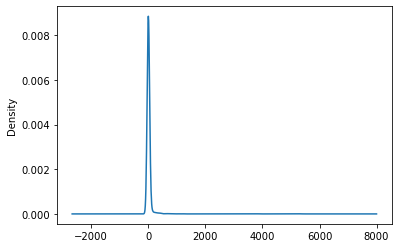

In [86]:
breed_intake_counts.plot.density()

In [87]:
# Determine which values to replace
replace_breed_intake = list(breed_intake_counts[breed_intake_counts < 687].index)
replace_breed_intake
# # Replace in DataFrame
for breed in replace_breed_intake:
    df_dog_ML.breed_intake = df_dog_ML.breed_intake.replace(breed,"Other")



# # # Check to make sure binning was successful
df_dog_ML.breed_intake.value_counts()


Other                        25849
Pit Bull Mix                  5332
Labrador Retriever Mix        4414
Chihuahua Shorthair Mix       3859
German Shepherd Mix           2007
Pit Bull                      1212
Australian Cattle Dog Mix     1043
Labrador Retriever             830
Chihuahua Shorthair            821
German Shepherd                696
Dachshund Mix                  687
Name: breed_intake, dtype: int64

In [88]:
enc_breed = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_breed = pd.DataFrame(enc_breed.fit_transform(df_dog_ML.breed_intake.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_breed.columns = enc_breed.get_feature_names_out(['breed_intake'])
encode_df_breed.head()

,breed_intake_Australian Cattle Dog Mix,breed_intake_Chihuahua Shorthair,breed_intake_Chihuahua Shorthair Mix,breed_intake_Dachshund Mix,breed_intake_German Shepherd,breed_intake_German Shepherd Mix,breed_intake_Labrador Retriever,breed_intake_Labrador Retriever Mix,breed_intake_Other,breed_intake_Pit Bull,breed_intake_Pit Bull Mix
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [89]:
df_dog_ML=df_dog_ML.merge(encode_df_breed,left_index=True,right_index=True).drop("breed_intake",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_2461/3827914156.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dog_ML=df_dog_ML.merge(encode_df_breed,left_index=True,right_index=True).drop("breed_intake",1)


In [90]:
df_dog_ML.head(2)

,intake_type,intake_condition,animal_type_intake,age_upon_intake(days),outcome_type,age_upon_outcome(days),days_in_shelter,color_intake_Black,color_intake_Black/Brown,color_intake_Black/Tan,...,breed_intake_Chihuahua Shorthair,breed_intake_Chihuahua Shorthair Mix,breed_intake_Dachshund Mix,breed_intake_German Shepherd,breed_intake_German Shepherd Mix,breed_intake_Labrador Retriever,breed_intake_Labrador Retriever Mix,breed_intake_Other,breed_intake_Pit Bull,breed_intake_Pit Bull Mix
0,Public Assist,Normal,Dog,5475,Return to Owner,5485,6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Stray,Normal,Dog,5110,Return to Owner,5208,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Hot encoding intake_condition to 10 categories and other (17 in total)

In [91]:
df_dog_ML.intake_condition.nunique()

12

In [92]:
# finding the count of all categories in color_intake
intake_condition_count = df_dog_ML.intake_condition.value_counts()
intake_condition_count

Normal        24738
Injured        1198
Sick            700
Nursing         394
Aged            142
Other            65
Medical          57
Neonatal         37
Pregnant         19
Behavior         13
Feral             5
Med Urgent        1
Name: intake_condition, dtype: int64

<AxesSubplot:ylabel='Density'>

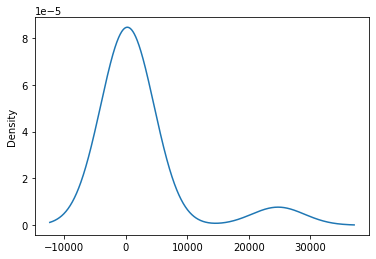

In [93]:
intake_condition_count.plot.density()

In [94]:
intake_condition_normal = ['Normal','Behavior']
intake_condition_aged = ['Aged'] 
intake_condtion_other = ['Injured','Sick','Nursing','Neonatal','Other','Medical','Feral','Pregnant','Med Urgent']

In [95]:
# Replace in dataframe based on the above intake_conditions.

# Replace in DataFrame
for condition in intake_condition_normal:
    df_dog_ML.intake_condition = df_dog_ML.intake_condition.replace(condition,"Normal")
    
for condition in intake_condition_aged:
    df_dog_ML.intake_condition = df_dog_ML.intake_condition.replace(condition,"Aged")

for condition in intake_condtion_other:
    df_dog_ML.intake_condition = df_dog_ML.intake_condition.replace(condition,"Other")

# Check to make sure binning was successful
df_dog_ML.intake_condition.value_counts()

Normal    24751
Other      2476
Aged        142
Name: intake_condition, dtype: int64

In [96]:
enc_condition = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_condition = pd.DataFrame(enc_condition.fit_transform(df_dog_ML.intake_condition.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_condition.columns = enc_condition.get_feature_names_out(['intake_condition'])
encode_df_condition.head()

,intake_condition_Aged,intake_condition_Normal,intake_condition_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [97]:
df_dog_ML=df_dog_ML.merge(encode_df_condition,left_index=True,right_index=True).drop("intake_condition",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_2461/456107252.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dog_ML=df_dog_ML.merge(encode_df_condition,left_index=True,right_index=True).drop("intake_condition",1)


In [98]:
df_dog_ML.head(2)

,intake_type,animal_type_intake,age_upon_intake(days),outcome_type,age_upon_outcome(days),days_in_shelter,color_intake_Black,color_intake_Black/Brown,color_intake_Black/Tan,color_intake_Black/White,...,breed_intake_German Shepherd,breed_intake_German Shepherd Mix,breed_intake_Labrador Retriever,breed_intake_Labrador Retriever Mix,breed_intake_Other,breed_intake_Pit Bull,breed_intake_Pit Bull Mix,intake_condition_Aged,intake_condition_Normal,intake_condition_Other
0,Public Assist,Dog,5475,Return to Owner,5485,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Stray,Dog,5110,Return to Owner,5208,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Hot encoding intake_type to 0 and 1 for 5 categories

In [99]:
df_dog_ML.intake_type.nunique()

5

In [100]:
# finding the count of all categories in color_intake
intake_type_count = df_dog_ML.intake_type.value_counts()
intake_type_count

Stray                 10984
Owner Surrender        3599
Public Assist          1386
Abandoned                85
Euthanasia Request       33
Name: intake_type, dtype: int64

<AxesSubplot:ylabel='Density'>

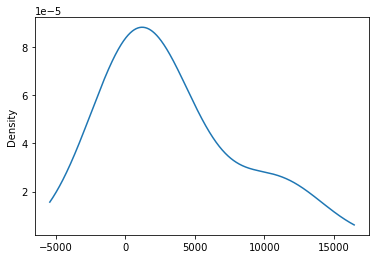

In [101]:
intake_type_count.plot.density()

In [102]:
# # Determine which values to replace
# replace_intake_condition = list(intake_type[intake_type < 465].index)
    
# # Replace in DataFrame
# for condition in replace_intake_condition:
#     df_dog_ML.intake_condition = df_dog_ML.intake_condition.replace(condition,"Other")


# # Check to make sure binning was successful
# df_dog_ML.intake_condition.value_counts()

In [103]:
enc_intake_type = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df_intake_type = pd.DataFrame(enc_intake_type.fit_transform(df_dog_ML.intake_type.values.reshape(-1,1)))
#print(encode_df)
# Rename encoded columns
encode_df_intake_type.columns = enc_intake_type.get_feature_names_out(['intake_type'])
encode_df_intake_type.head()

,intake_type_Abandoned,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [104]:
df_dog_ML=df_dog_ML.merge(encode_df_intake_type,left_index=True,right_index=True).drop("intake_type",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_2461/3144135216.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dog_ML=df_dog_ML.merge(encode_df_intake_type,left_index=True,right_index=True).drop("intake_type",1)


In [105]:
df_dog_ML.head(2)

,animal_type_intake,age_upon_intake(days),outcome_type,age_upon_outcome(days),days_in_shelter,color_intake_Black,color_intake_Black/Brown,color_intake_Black/Tan,color_intake_Black/White,color_intake_Brown,...,breed_intake_Pit Bull,breed_intake_Pit Bull Mix,intake_condition_Aged,intake_condition_Normal,intake_condition_Other,intake_type_Abandoned,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
0,Dog,5475,Return to Owner,5485,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Dog,5110,Return to Owner,5208,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Hot encoding animal_type_intake to 0 and 1 for 5 categories 

In [106]:
# df_dog_ML.animal_type_intake.nunique()

In [107]:
# # finding the count of all categories in color_intake
# animal_intake_type_count = df_dog_ML.animal_type_intake.value_counts()
# animal_intake_type_count

In [108]:
#animal_intake_type_count.plot.density()

In [109]:
# # Determine which values to replace
# replace_intake_condition = list(intake_type[intake_type < 465].index)

# # Replace in DataFrame
# for condition in replace_intake_condition:
#     df_dog_ML.intake_condition = df_dog_ML.intake_condition.replace(condition,"Other")


# # Check to make sure binning was successful
# df_dog_ML.intake_condition.value_counts()

In [110]:
# enc_animal_intake_type = OneHotEncoder(sparse=False)

# # Fit the encoder and produce encoded DataFrame
# encode_df_animal_intake_type = pd.DataFrame(enc_animal_intake_type.fit_transform(df_dog_ML.animal_type_intake.values.reshape(-1,1)))
# #print(encode_df)
# # Rename encoded columns
# encode_df_animal_intake_type.columns = enc_animal_intake_type.get_feature_names_out(['animal_type_intake'])
# encode_df_animal_intake_type.head()

In [111]:
# df_dog_ML=df_dog_ML.merge(encode_df_intake_type,left_index=True,right_index=True).drop("animal_type_intake",1)


In [112]:
df_dog_ML.head(2)

,animal_type_intake,age_upon_intake(days),outcome_type,age_upon_outcome(days),days_in_shelter,color_intake_Black,color_intake_Black/Brown,color_intake_Black/Tan,color_intake_Black/White,color_intake_Brown,...,breed_intake_Pit Bull,breed_intake_Pit Bull Mix,intake_condition_Aged,intake_condition_Normal,intake_condition_Other,intake_type_Abandoned,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray
0,Dog,5475,Return to Owner,5485,6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Dog,5110,Return to Owner,5208,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Hot encoding outcome_type  to 0 and 1 for categories

In [113]:
df_dog_ML['outcome_type'].unique()

array(['Return to Owner', 'Euthanasia', 'Transfer', 'Adoption',
       'Rto-Adopt', 'Died', 'Missing', 'Disposal', nan], dtype=object)

In [114]:
# finding the count of all categories in color_intake
outcome_type_count = df_dog_ML.outcome_type.value_counts()
outcome_type_count

Adoption           4552
Return to Owner    2546
Transfer           2092
Euthanasia          225
Rto-Adopt            77
Died                 33
Disposal              7
Missing               4
Name: outcome_type, dtype: int64

<AxesSubplot:ylabel='Density'>

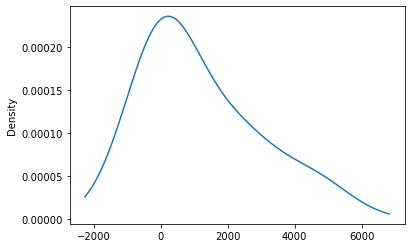

In [115]:
outcome_type_count.plot.density()

### Categorizing output into Adopted( 'Adoption','Return to Owner','Rto-Adopt') & Other

In [116]:
# # Determine which values to replace
# replace_intake_condition = list(intake_type[intake_type < 465].index)

other_outcome_type_list = ['Transfer','Euthanasia','Died','Disposal','Missing']
success_outcome_list = ['Adoption','Return to Owner','Rto-Adopt']
             

# # Replace in DataFrame
for outcome in other_outcome_type_list:
    df_dog_ML.outcome_type = df_dog_ML.outcome_type.replace(outcome,"Failure")
    
for outcome in success_outcome_list:
    df_dog_ML.outcome_type = df_dog_ML.outcome_type.replace(outcome,"Success")


# # Check to make sure binning was successful
df_dog_ML.outcome_type.value_counts()

Success    7175
Failure    2361
Name: outcome_type, dtype: int64

In [117]:
adopted_dummies = pd.get_dummies(df_dog_ML["outcome_type"])
adopted_dummies

,Failure,Success
0,0,1
1,0,1
3,1,0
5,1,0
6,0,1
...,...,...
16078,0,1
16079,0,1
16081,0,1
16083,0,1


In [118]:
df_dog_ML=df_dog_ML.merge(adopted_dummies,left_index=True,right_index=True).drop("outcome_type",1)


/var/folders/3m/mj278b89297553km9_g94ghr0000gn/T/ipykernel_2461/50248661.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_dog_ML=df_dog_ML.merge(adopted_dummies,left_index=True,right_index=True).drop("outcome_type",1)


In [119]:
# Since the Logistic Regression Model is generated for Dogs, we can drop the animal_type_intake

df_dog_ML=df_dog_ML.drop("animal_type_intake",axis=1)
df_dog_ML.head()

,age_upon_intake(days),age_upon_outcome(days),days_in_shelter,color_intake_Black,color_intake_Black/Brown,color_intake_Black/Tan,color_intake_Black/White,color_intake_Brown,color_intake_Brown/White,color_intake_Other,...,intake_condition_Aged,intake_condition_Normal,intake_condition_Other,intake_type_Abandoned,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,Failure,Success
0,5475,5485,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
1,5110,5208,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
3,4745,4880,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
5,4380,4454,11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0
6,4745,4997,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [120]:
# Seperate the features X from the target Y
y = df_dog_ML.Success
columns=["Success","Failure"]
X = df_dog_ML.drop(columns=columns)


# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [121]:
X_train.shape

(7155, 33)

In [122]:
X_test.shape

(2386, 33)

In [123]:
# Create a StandardScaler instance
scaler = StandardScaler()

# # Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled)

[[ 0.76756472  0.86668146 -0.32500828 ... -0.5306308  -0.30556173
   0.67421357]
 [ 1.74639059  1.65222344 -0.2054794  ... -0.5306308  -0.30556173
   0.67421357]
 [-0.58670121 -0.60326723 -0.12579349 ... -0.5306308  -0.30556173
   0.67421357]
 ...
 [-0.21126115 -0.25975609 -0.22540088 ... -0.5306308  -0.30556173
   0.67421357]
 [-0.21126115  0.03231557 -0.28516532 ...  1.88454947 -0.30556173
  -1.48320955]
 [ 2.72521646  2.60254614 -0.28516532 ... -0.5306308  -0.30556173
   0.67421357]]


# Create a Logistic Regression Model

In [124]:

model_lr_dog = LogisticRegression(max_iter=1000,random_state=1)

In [125]:
from sklearn._config import get_config, set_config

# get_config()["print_changed_only"]
set_config(print_changed_only=False)



In [126]:
model_lr_dog.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_pred = model_lr_dog.predict(X_test)

results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [128]:
# Print the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7510477787091366


In [129]:
from sklearn.metrics import confusion_matrix, classification_report

In [130]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[   0  592]
 [   2 1792]]


In [131]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.75      1.00      0.86      1794

    accuracy                           0.75      2386
   macro avg       0.38      0.50      0.43      2386
weighted avg       0.57      0.75      0.64      2386



# Create a Random Forest Classifier Model

In [132]:
# Create a random forest classifier.
model_rf_dog = RandomForestClassifier(n_estimators=1000, random_state=23) 

In [133]:
# Fitting the model
model_rf_dog = model_rf_dog.fit(X_train_scaled, y_train)

In [134]:
y_test.shape

(2386,)

In [135]:
# Making predictions using the testing data.
predictions = model_lr_dog.predict(X_test_scaled)
predictions

/Users/pappus/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [136]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Failure", "Success"], columns=["Failure", "Success"])

cm_df

,Failure,Success
Failure,27,565
Success,62,1732


In [137]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

acc_score

0.7372170997485331

In [138]:
# Displaying results
print("Confusion Matrix for Dogs")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix for Dogs


,Failure,Success
Failure,27,565
Success,62,1732


Accuracy Score : 0.7372170997485331
Classification Report
              precision    recall  f1-score   support

           0       0.30      0.05      0.08       592
           1       0.75      0.97      0.85      1794

    accuracy                           0.74      2386
   macro avg       0.53      0.51      0.46      2386
weighted avg       0.64      0.74      0.66      2386



# List the features sorted in descending order by feature importance for Dogs


In [139]:
attributes = list(df_dog_ML)

sorted(zip(model_rf_dog.feature_importances_, attributes), reverse=True)

#print(attributes,model_brfc.feature_importances_)

[(0.39309657309654383, 'age_upon_outcome(days)'),
 (0.24277747567607447, 'days_in_shelter'),
 (0.1568803427337322, 'age_upon_intake(days)'),
 (0.015147144776372922, 'color_intake_Other'),
 (0.014008047917282588, 'breed_intake_Other'),
 (0.012890201019817811, 'intake_type_Stray'),
 (0.011385420311026942, 'intake_type_Owner Surrender'),
 (0.010216272413649438, 'color_intake_Black/White'),
 (0.009652607249224893, 'breed_intake_Pit Bull Mix'),
 (0.009007953197859351, 'breed_intake_Chihuahua Shorthair Mix'),
 (0.008893575835203442, 'breed_intake_Labrador Retriever Mix'),
 (0.008336976988455175, 'intake_type_Public Assist'),
 (0.0076031354169581395, 'color_intake_Brown/White'),
 (0.007474513331844545, 'color_intake_Tan/White'),
 (0.007354391494561423, 'intake_condition_Normal'),
 (0.00721322283037814, 'color_intake_Black'),
 (0.007124962082525152, 'intake_condition_Other'),
 (0.00676771954252847, 'color_intake_White'),
 (0.006545532706169518, 'color_intake_Brown'),
 (0.00619199315030537, 'co

## Calculate feature importance in the Random Forest model.


In [140]:
importances = model_rf_dog.feature_importances_
importances

array([0.15688034, 0.39309657, 0.24277748, 0.00721322, 0.00589138,
       0.00619199, 0.01021627, 0.00654553, 0.00760314, 0.01514714,
       0.00588383, 0.00747451, 0.00608304, 0.00676772, 0.00455851,
       0.00369315, 0.00900795, 0.0040358 , 0.00319397, 0.00581886,
       0.00324405, 0.00889358, 0.01400805, 0.00557647, 0.00965261,
       0.00123593, 0.00735439, 0.00712496, 0.00167482, 0.00054213,
       0.01138542, 0.00833698, 0.0128902 ])

Text(69.0, 0.5, 'Truth')

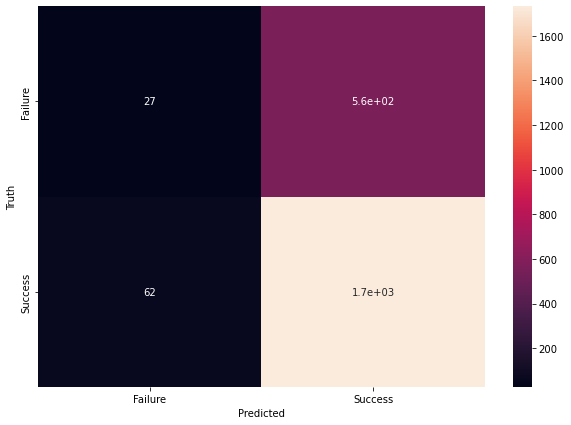

In [141]:
#Plotting a confustion matrix using matplotlib


%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_df,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')